In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory
from oqtant.schemas.quantum_matter import QuantumMatter as qm
from oqtant.schemas.output import Gaussian_dist_2D
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.optimize as opt
from IPython.display import HTML

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │
╞══════════════╪═══════════════════╪═══════════════╡
│            6 │                 4 │            10 │
╘══════════════╧═══════════════════╧═══════════════╛


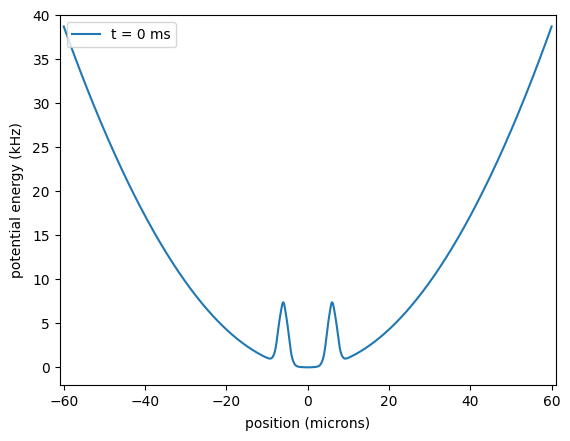

In [18]:
# Define parameters - play around with these and see how they affect the data!
time_final = (
    3  # ms - Longest in-trap time to be used.  Try making this shorter or longer!
)
it_times = np.arange(
    1, time_final + 1, 1
)  # A list of in-trap times from 1ms to "time_final" ms, in steps of 1ms
matters_it = []  # Initialize list to hold matter objects
height = 7  # kHz - barrier height.  What happens if this gets higher?
position = -6  # um - center location of barrier.  Try moving this around!
temp = 50  # nK - desired cloud temperature.  Will the zeroth sound disappear if we go to higher temperatures?

# Create a quantum matter object with NO barrier for establishing a baseline BEC distribution
matter_baseline = qmf.create_quantum_matter(
    temperature=temp, lifetime=it_times[0], image="IN_TRAP", name="Double-Barrier interference (baseline)"
)

matters_it.append(matter_baseline)

# Loop over in-trap times to populate list of matter objects with barriers and varying in-trap times
for time in it_times:
    # Create barrier
    barrier_left = qmf.create_barrier(
        positions=2 * [position], heights=2 * [height], widths=2 * [1], times=[0, time]
    )

    barrier_right = qmf.create_barrier(
        positions=2 * [-position], heights=2 * [height], widths=2 * [1], times=[0, time]
    )

    # Append matter object to list
    matters_it.append(
        qmf.create_quantum_matter(
            temperature=temp,
            lifetime=time,
            barriers=[barrier_left, barrier_right],
            image="IN_TRAP",
            name=f"Double-Barrier interference w/ TOF = {time:0.0f} ms",
        )
    )

# Plot what the potential looks like at time t=0
matters_it[-1].show_potential(times=[0], ylimits=[-2, 40])

In [17]:
#submission = [matter.submit() for matter in matters_it]

In [19]:
#matter_baseline.submit()

Submitting 1 job(s):

- Job: Double-Barrier interference (baseline)
  Job ID: fa08e36a-4667-42c1-b63c-1319c8642abf
